# Breast tumor classifier model building 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

## 1 - Preprocessing 

In [2]:
# importing and getting a scence of the data 
tumors_data = pd.read_csv('breast_cancer.csv') 
tumors_data.head() 

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# more detail on each column 
tumors_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

No null values to deal with! All we have to do is to one-hot encode the diagnosis column. 

In [4]:
# encodein 
tumors_data = pd.get_dummies(data= tumors_data, columns=['diagnosis'], drop_first=True, dtype=int) 
tumors_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [5]:
tumors_data['diagnosis_M'].value_counts() / len(tumors_data) * 100

diagnosis_M
0    62.741652
1    37.258348
Name: count, dtype: float64

The benign classe has almost twise as many samples than the other one 

In [6]:
# identifying features and labels 
X = tumors_data.iloc[:, 1:-2] 
y = tumors_data.iloc[:, -1] 

**Note!**  
since the data set length is small we wouldn't be using a validation set. 

In [7]:
# Splitting the data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
print(f"train:{len(X_train)}, test:{len(X_test)}")

train:455, test:114


In [8]:
# Scaling the data 
from sklearn.preprocessing import StandardScaler 
scalor = StandardScaler()
X_train = scalor.fit_transform(X_train) 
X_test = scalor.transform(X_test) 

## 2 - Model building 

In [9]:
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

Here we use grid search to get some insigts about each model's hyperparameter optimize range and a general performance indication using croos validation. We aren't fitting the model to the parameters evaluated by the grid search yet.

In [10]:
logistisc = LogisticRegression()
logistis_param_grid = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                      'penalty': ['l1', 'l2'],
                       'solver': ['liblinear', 'saga'],
                       'class_weight': [None, 'balanced']}


logistic_search = GridSearchCV(estimator=logistisc, 
                               param_grid=logistis_param_grid,  
                               cv=5,  
                               n_jobs=-1,
                               refit=False) 

logistic_search.fit(X_train, y_train) 

print(logistic_search.best_params_) 
print(logistic_search.best_score_)

{'C': 0.1, 'class_weight': None, 'penalty': 'l2', 'solver': 'liblinear'}
0.9780219780219781


Now that we have a scence of the range of hyper parameters we twist them a little more manually to achieve the heighest score.

In [21]:
log = LogisticRegression(C= 0.1, class_weight=None, penalty= 'l2', solver= 'liblinear') 
scores = cross_val_score(log,
                         X_train,
                         y_train, 
                         cv=5,
                         scoring='accuracy')


print(f"Mean accuracy: {scores.mean():.3f}") 

Mean accuracy: 0.978


In [22]:
rf = RandomForestClassifier(max_depth= 20, max_features= 'sqrt', min_samples_split= 5, n_estimators= 200, random_state=42)

scores = cross_val_score(rf,
                         X_train,
                         y_train, 
                         cv=5,
                         scoring='accuracy',)


print(f"Mean accuracy: {scores.mean():.3f}") 

Mean accuracy: 0.958


In [23]:
gb = GradientBoostingClassifier(learning_rate= 0.05,
                                max_depth= 5,
                                max_features= 'sqrt',
                                min_samples_split= 6,
                                n_estimators= 400,
                                subsample= 0.6,
                               random_state=42)

scores = cross_val_score(gb,
                         X_train,
                         y_train, 
                         cv=5,
                         scoring='accuracy')


print(f"Mean accuracy: {scores.mean():.3f}") 

Mean accuracy: 0.976


Above scores are the best I could get. Seeing the result on the testing data: 

In [24]:
logistic_tuned = LogisticRegression(C= 0.1, class_weight=None, penalty= 'l2', solver= 'liblinear') 
logistic_tuned.fit(X_train, y_train) 
yhat_log = logistic_tuned.predict(X_test) 

print(f"accuracy: {accuracy_score(y_test, yhat_log):.3f}") 
print(f"confusion matrix:\n {confusion_matrix(y_test, yhat_log)}")

accuracy: 0.991
confusion matrix:
 [[71  0]
 [ 1 42]]


In [25]:
rf_tuned = RandomForestClassifier(max_depth= 20, max_features= 'sqrt', min_samples_split= 5, n_estimators= 200, random_state=42)

rf_tuned.fit(X_train, y_train) 
yhat_rf = rf_tuned.predict(X_test) 

print(f"accuracy: {accuracy_score(y_test, yhat_rf):.3f}") 
print(f"confusion matrix:\n {confusion_matrix(y_test, yhat_rf)}")

accuracy: 0.965
confusion matrix:
 [[70  1]
 [ 3 40]]


In [26]:
gb_tuned = GradientBoostingClassifier(learning_rate= 0.05,
                                max_depth= 5,
                                max_features= 'sqrt',
                                min_samples_split= 6,
                                n_estimators= 400,
                                subsample= 0.6,
                               random_state=42)

gb_tuned.fit(X_train, y_train) 
yhat_gb = gb_tuned.predict(X_test) 

print(f"accuracy: {accuracy_score(y_test, yhat_gb):.3f}") 
print(f"confusion matrix:\n {confusion_matrix(y_test, yhat_gb)}")

accuracy: 0.965
confusion matrix:
 [[70  1]
 [ 3 40]]


### The logistic model would be picked for as the chosen model as it has the most accuracy and only one false prediction on the testing data.

## 3 - Trial for furthur improvements 

### If we try to furthur tune the logistic model it would get overfitted. Instead we shall try to do some future engineering.

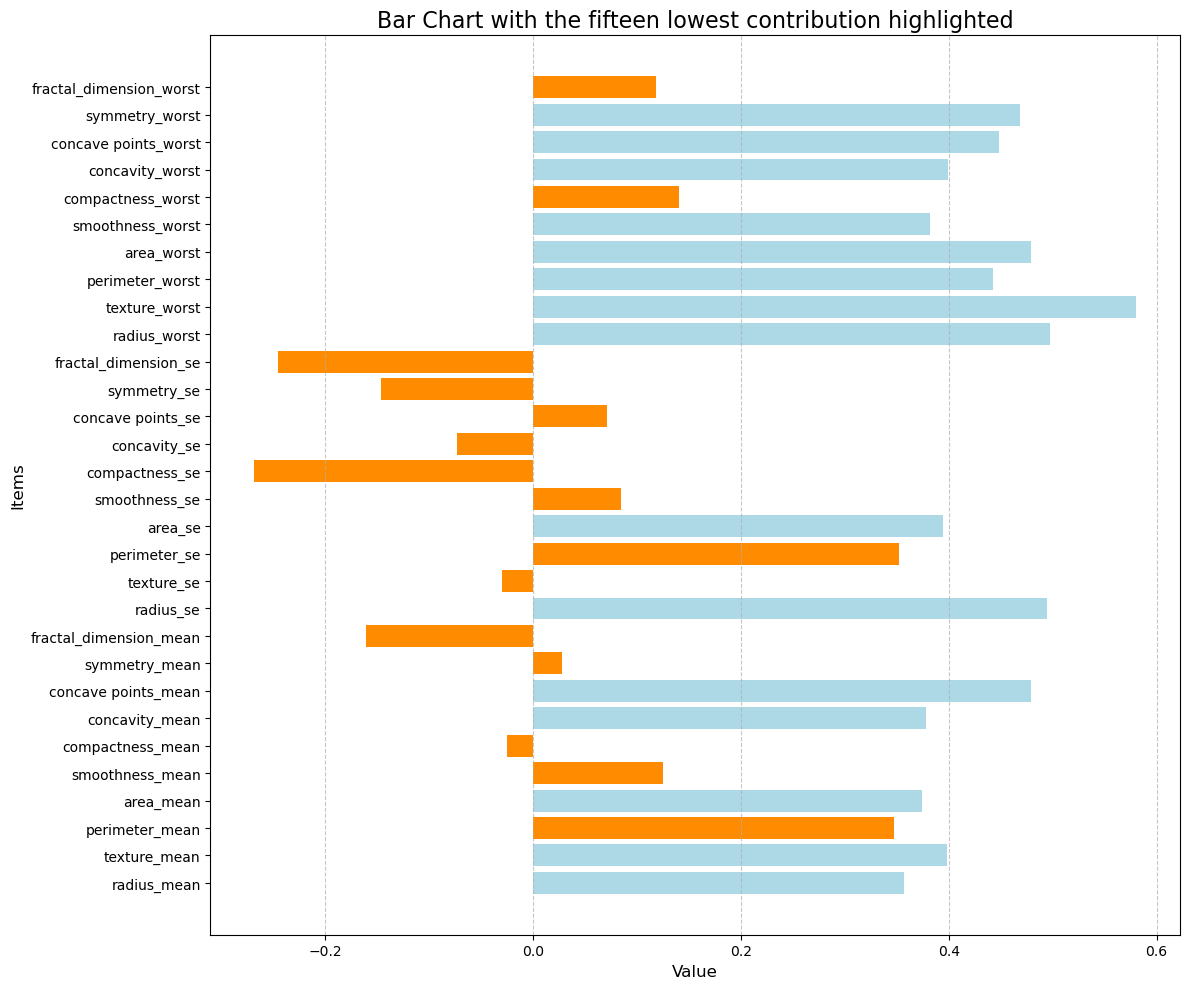

In [85]:
# let's see which features has the most and least contribution to the predictions
labels = tumors_data.columns[1:-2]
values = logistic_tuned.coef_[0]


# The first 5 of these indices correspond to the smallest values
sorted_indices = np.argsort(np.absolute(values))
indices_of_smallest_values = sorted_indices[:15]


# Initialize a list of colors with a default color for all bars
colors = ['lightblue'] * len(values)

# Set the highlight color for the bars with the smallest values
highlight_color = 'darkorange'
for i in indices_of_smallest_values:
    colors[i] = highlight_color

# Plot the horizontal bar chart
plt.figure(figsize=(12, 10))
plt.barh(labels, values, color=colors)
plt.title('Bar Chart with the fifteen lowest contribution highlighted', fontsize=16)
plt.xlabel('Value', fontsize=12)
plt.ylabel('Items', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show() 


In [89]:
# Creating a reduced dataset
columns_to_drop = [labels[i] for i in indices_of_smallest_values]  
reduced_X = X.drop(columns=columns_to_drop) 
 
# splitting the new dataset
X_train_redu, X_test_redu, y_train, y_test = train_test_split(reduced_X, y, test_size=0.2, random_state=42) 
print(f"train:{len(X_train_redu)}, test:{len(X_test_redu)}")

train:455, test:114


In [90]:
#scaling the new dataset 
new_scalor = StandardScaler() 
X_train_redu = new_scalor.fit_transform(X_train_redu) 
X_test_redu = new_scalor.transform(X_test_redu)

In [91]:
final_model = LogisticRegression(C= 0.1, class_weight=None, penalty= 'l2', solver= 'liblinear') 
final_model.fit(X_train_redu, y_train) 
yhat_fin = final_model.predict(X_test_redu) 

print(f"accuracy: {accuracy_score(y_test, yhat_fin):.3f}") 
print(f"confusion matrix:\n {confusion_matrix(y_test, yhat_fin)}")

accuracy: 0.982
confusion matrix:
 [[71  0]
 [ 2 41]]


The model is able to conserve the accuracy nicely with only half of the features! 🎉

In [93]:
random_sample = X_train_redu[np.random.randint(low=0, high=X_train_redu.shape[0])-1, :].reshape(1,-1)


y_pred = final_model.predict(random_sample) 
prob = final_model.predict_proba(random_sample)[0]

if y_pred: 
    print(f"The patient's tumor is diagnosed non-cancerous. Confidence: {round(prob[1],4)*100:.3f}%") 
else: 
    print(f"The patient's tumor is diagnosed non-cancerous. Confidence: {round(prob[0],4)*100:.3f}%")

The patient's tumor is diagnosed non-cancerous. Confidence: 99.820%
